In [1]:
import pandas as pd
from neuronunit.optimisation.optimization_management import instance_opt
from neuronunit.optimisation.optimization_management import plot_as_normal

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

import matplotlib.pyplot as plt
#plt.plot()
#plt.show()

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
import pickle
import glob
import os
from neuronunit.optimisation.optimization_management import check_binary_match, which_key
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
from neuronunit.capabilities.spike_functions import get_spike_waveforms#
#check_match_front, inject_and_not_plot_model
import os
import pickle
from neuronunit.optimisation.optimization_management import TSD

from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from neuronunit.optimisation.brian_glif_model_parameters import MODEL_PARAMS as OTHER_MODEL_PARAMS
import scipy
from neuronunit.optimisation.optimization_management import inject_and_not_plot_model, plot_as_normal
from neuronunit.optimisation.optimization_management import inject_and_plot_model, plot_as_normal


In [2]:
#import quantities as pq
#pq.PREFERED

In [3]:


cells = pickle.load(open("processed_multicellular_constraints.p","rb"))

purk = TSD(cells['Cerebellum Purkinje cell'])#.tests
purk_vr = purk["RestingPotentialTest"].observation['mean']

ncl5 = TSD(cells["Neocortex pyramidal cell layer 5-6"])
ncl5.name = str("Neocortex pyramidal cell layer 5-6")
ncl5_vr = ncl5["RestingPotentialTest"].observation['mean']

ca1 = TSD(cells['Hippocampus CA1 pyramidal cell'])
ca1_vr = ca1["RestingPotentialTest"].observation['mean']


olf = TSD(pickle.load(open("olf_tests.p","rb")))
olf.use_rheobase_score = False
cells.pop('Olfactory bulb (main) mitral cell',None)
cells['olf_mit'] = olf

experimental_constraints= cells

list_of_dicts = []
for k,v in cells.items():
    observations = {}
    for k1 in ca1.keys():
        vsd = TSD(v)
        if k1 in vsd.keys():
            vsd[k1].observation['mean']
            observations[k1] = vsd[k1].observation['mean']
            observations['name'] = k
    list_of_dicts.append(observations)
df = pd.DataFrame(list_of_dicts)
df
df = df.set_index('name').T

s = df.style.background_gradient(cmap=cm)
s

name,Hippocampus CA1 pyramidal cell,Cerebellum Purkinje cell,Neocortex pyramidal cell layer 5-6,olf_mit
RheobaseTest,189.24 pA,680.794444444444 pA,213.849583333333 pA,nan
InputResistanceTest,107.080327644332 Mohm,142.057692307692 Mohm,120.672073643411 Mohm,130.083333333333 Mohm
TimeConstantTest,24.5021946169772 ms,nan,15.7342424242424 ms,24.4833333333333 ms
CapacitanceTest,89.7960714285714 pF,620.2725 pF,150.584166666667 pF,235.75 pF
RestingPotentialTest,-65.2261863636364 mV,-61.5916666666667 mV,-68.2481434599156 mV,-58.140625 mV
InjectedCurrentAPWidthTest,1.31895278450363 ms,0.41412962962963 ms,1.20769387755102 ms,1.61 ms
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,71.2308333333333 mV,80.4351020408164 mV,68.4 mV
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-46.8947619047619 mV,-42.7357232704403 mV,-38.9 mV


In [4]:
try:
    temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 45
    NGEN = 150
    inal_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints["Neocortex pyramidal cell layer 5-6"],
        MODEL_PARAMS,"Neocortex pyramidal cell layer 5-6","IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)
    
    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open("Neocortex pyramidal cell layer 5-6"+"IZHI_.p","wb"))
    chi_sqr_opt, p_value
chi_sqr_opt, p_value
df = pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}]).T    
    

In [5]:
opt.SA.to_frame().T

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
0,1.133177,0.444622,0.450915,0.029973,0.012897,0.16468,0.003763,0.512854


In [6]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
RheobaseTest,213.849583333333 pA,45.0439453125 pA,1.13318
InputResistanceTest,120.672073643411 Mohm,84.47885606885278 megaohm,0.444622
TimeConstantTest,15.7342424242424 ms,12.284367934517713 ms,0.450915
CapacitanceTest,150.584166666667 pF,145.4135212781005 pF,0.0299731
RestingPotentialTest,-68.2481434599156 mV,-68.3530583578185 mV,0.0128969
InjectedCurrentAPWidthTest,1.20769387755102 ms,1.3100000000000003 ms,0.16468
InjectedCurrentAPAmplitudeTest,80.4351020408164 mV,80.49511842343712 mV,0.00376319
InjectedCurrentAPThresholdTest,-42.7357232704403 mV,-38.5050967026868 mV,0.512854


# Izhikevich model Hippocampus CA1 pyramidal experiment.

In [7]:
try:
    temp = pickle.load(open("Hippocampus CA1 pyramidal cell"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 45
    NGEN = 150
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Hippocampus CA1 pyramidal cell'],
        MODEL_PARAMS,'Hippocampus CA1 pyramidal cell',"IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Hippocampus CA1 pyramidal cell'+"IZHI_.p","wb"))
chi_sqr_opt, p_value
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}])

,chi_square,p_value
0,2.125091,0.976935


In [8]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
RheobaseTest,189.24 pA,32.244873046875 pA,0.536865
InputResistanceTest,107.080327644332 Mohm,97.76274731515429 megaohm,0.100485
TimeConstantTest,24.5021946169772 ms,9.604335816193002 ms,0.717214
CapacitanceTest,89.7960714285714 pF,98.24126346645974 pF,0.133624
RestingPotentialTest,-65.2261863636364 mV,-65.55690901865944 mV,0.0554458
InjectedCurrentAPWidthTest,1.31895278450363 ms,1.2000000000000002 ms,0.16846
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,86.96668801838769 mV,0.0399524
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-39.99765398466066 mV,1.12315


(AnalogSignal with 1 channels of length 130000; units mV; datatype float64 
 sampling rate: 100.0 1/ms
 time: 0.0 s to 1.3 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <neuronunit.optimisation.data_transport_container.DataTC at 0x7fa34d528310>)

<Figure size 432x288 with 0 Axes>

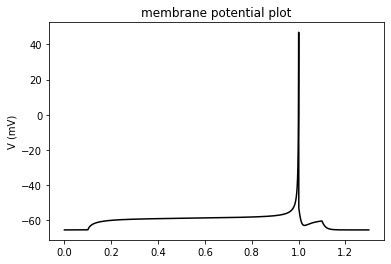

In [9]:
opt.SA

out = inject_and_plot_model(opt,plotly=False)

out


# Conductance Based model Hippocampus CA1 pyramidal experiment.

In [10]:

try:

    temp = pickle.load(open("Hippocampus CA1 pyramidal cell"+"NEURONHH_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 45
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Hippocampus CA1 pyramidal cell'],
        MODEL_PARAMS,'Hippocampus CA1 pyramidal cell',"NEURONHH",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Hippocampus CA1 pyramidal cell'+"NEURONHH_.p","wb"))
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}])

,chi_square,p_value
0,17.216463,0.027932


In [11]:
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}])

,chi_square,p_value
0,17.216463,0.027932


In [12]:

out = inject_and_not_plot_model(opt)

In [13]:
opt.SA.to_frame().T

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
0,0.104364,0.26776,0.909698,0.779279,0.263258,2.539904,0.197484,3.023183


In [14]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
RheobaseTest,189.24 pA,225.0 pA,0.104364
InputResistanceTest,107.080327644332 Mohm,130.26055973925207 megaohm,0.26776
TimeConstantTest,24.5021946169772 ms,6.518945502058039 ms,0.909698
CapacitanceTest,89.7960714285714 pF,50.04542829469856 pF,0.779279
RestingPotentialTest,-65.2261863636364 mV,-63.787552448611955 mV,0.263258
InjectedCurrentAPWidthTest,1.31895278450363 ms,0.25 ms,2.5399
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,89.14231395773962 mV,0.197484
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-62.833162761594465 mV,3.02318


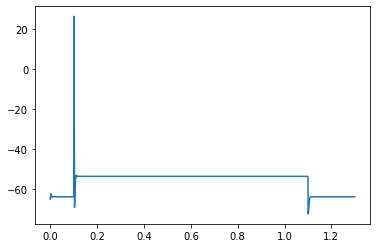

In [15]:
plt.plot(out.times,out.magnitude)
plt.show()


# Adaptive Exponential Model Hippocampus CA1 pyramidal Experiment.

In [16]:
try:
    temp = pickle.load(open("Hippocampus CA1 pyramidal cell"+"ADEXP_.p","rb"))
    final_pop, hall_of_fame, logs, hist, ad_opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 25
    NGEN = 100
    final_pop, hall_of_fame, logs, hist, ad_opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Hippocampus CA1 pyramidal cell'],
        MODEL_PARAMS,'Hippocampus CA1 pyramidal cell',"ADEXP",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, ad_opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Hippocampus CA1 pyramidal cell'+"ADEXP_.p","wb"))


<Figure size 432x288 with 0 Axes>

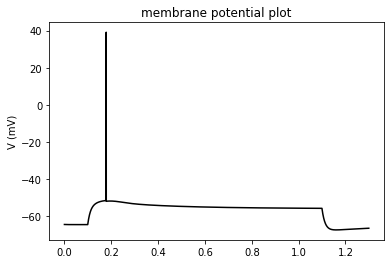

In [17]:
plt_tuple = inject_and_plot_model(ad_opt,plotly=False)

In [18]:
plt_tuple[1].show()

In [19]:
chi_sqr_opt, p_value
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}]).T

,0
chi_square,10.232514
p_value,0.249084


In [20]:
opt.SA.to_frame().T

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
0,0.104364,0.26776,0.909698,0.779279,0.263258,2.539904,0.197484,3.023183


In [21]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
RheobaseTest,189.24 pA,225.0 pA,0.104364
InputResistanceTest,107.080327644332 Mohm,130.26055973925207 megaohm,0.26776
TimeConstantTest,24.5021946169772 ms,6.518945502058039 ms,0.909698
CapacitanceTest,89.7960714285714 pF,50.04542829469856 pF,0.779279
RestingPotentialTest,-65.2261863636364 mV,-63.787552448611955 mV,0.263258
InjectedCurrentAPWidthTest,1.31895278450363 ms,0.25 ms,2.5399
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,89.14231395773962 mV,0.197484
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-62.833162761594465 mV,3.02318


# Olfactory Mitral Cell Experiment/ Izhikevich Model

In [22]:
if type(experimental_constraints['olf_mit']) is not type(list()):
    experimental_constraints['olf_mit'] = list(experimental_constraints['olf_mit'].values())    
try:
    temp = pickle.load(open("olf_mit"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 40
    NGEN = 150
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['olf_mit'],
        MODEL_PARAMS,'olf_mit',"IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('olf_mit'+"IZHI_.p","wb"))


In [23]:
pd.DataFrame([{'chi_square':chi_sqr_opt,'p_value':p_value}]).T

,0
chi_square,2.019044
p_value,0.980422


In [24]:
opt.SA.to_frame().T

,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
0,0.209574,0.178053,0.030453,0.297853,0.19034,0.035634,1.347693


In [25]:
opt.make_pretty(opt.tests)
opt.obs_preds

,observations,predictions,Z-Scores
InputResistanceTest,130.083333333333 Mohm,111.76440601217192 megaohm,0.209574
TimeConstantTest,24.4833333333333 ms,26.351190325249217 ms,0.178053
CapacitanceTest,235.75 pF,235.77444076765715 pF,0.0304534
RestingPotentialTest,-58.140625 mV,-59.78177430465574 mV,0.297853
InjectedCurrentAPWidthTest,1.61 ms,1.54 ms,0.19034
InjectedCurrentAPAmplitudeTest,68.4 mV,68.6158436132009 mV,0.0356342
InjectedCurrentAPThresholdTest,-38.9 mV,-30.452468089353545 mV,1.34769


# Neocortex Pyramidal Experiment Conductance based model

# Cerebellum Purkinje cell Experiment Conductance Izhikevich Model

In [26]:
    
try:
    temp = pickle.load(open("Cerebellum Purkinje cell"+"IZHI_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 25
    NGEN = 200
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Cerebellum Purkinje cell'],
        MODEL_PARAMS,'Cerebellum Purkinje cell',"IZHI",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp =  final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value
    pickle.dump(temp,open('Cerebellum Purkinje cell'+"IZHI_.p","wb"))


INFO:__main__:gen	nevals	avg    	std    	min    	max   
1  	25    	279.541	609.858	9.86573	2489.8
gen	nevals	avg    	std    	min    	max   
1  	25    	279.541	609.858	9.86573	2489.8


INFO:__main__:2  	15    	204.664	481.994	9.86573	2489.8
2  	15    	204.664	481.994	9.86573	2489.8
INFO:__main__:3  	14    	174.125	443.511	9.86573	1823.85
3  	14    	174.125	443.511	9.86573	1823.85
INFO:__main__:4  	11    	102.304	302.588	9.86573	1589.81
4  	11    	102.304	302.588	9.86573	1589.81
INFO:__main__:5  	13    	184.425	470.859	9.86573	2054.26
5  	13    	184.425	470.859	9.86573	2054.26
INFO:__main__:6  	11    	244.305	459.627	9.86573	2054.26
6  	11    	244.305	459.627	9.86573	2054.26
INFO:__main__:7  	16    	410.014	634.032	9.86573	2054.26
7  	16    	410.014	634.032	9.86573	2054.26
INFO:__main__:8  	13    	319.866	519.987	9.86573	2539.96
8  	13    	319.866	519.987	9.86573	2539.96
INFO:__main__:9  	12    	231.021	680.112	9.73858	2539.96
9  	12    	231.021	680.112	9.73858	2539.96
INFO:__main__:10 	14    	231.591	668.845	9.73858	3143.65
10 	14    	231.591	668.845	9.73858	3143.65
INFO:__main__:11 	11    	204.547	603.806	9.45437	2539.96
11 	11    	204.547	603.806	9.45437	2539.96
IN

INFO:__main__:84 	12    	17.4727	13.9747	8.31687	108.809
84 	12    	17.4727	13.9747	8.31687	108.809
INFO:__main__:85 	9     	19.35  	13.7206	8.31687	108.072
85 	9     	19.35  	13.7206	8.31687	108.072
INFO:__main__:86 	11    	36.3318	62.4491	8.31687	404.767
86 	11    	36.3318	62.4491	8.31687	404.767
INFO:__main__:87 	13    	24.4995	27.7999	8.31687	108.072
87 	13    	24.4995	27.7999	8.31687	108.072
INFO:__main__:88 	11    	17.9127	13.1706	8.31687	108.484
88 	11    	17.9127	13.1706	8.31687	108.484
INFO:__main__:89 	8     	15.6091	3.80388	8.31687	25.0788
89 	8     	15.6091	3.80388	8.31687	25.0788
INFO:__main__:90 	12    	16.5231	5.81132	8.31687	25.4366
90 	12    	16.5231	5.81132	8.31687	25.4366
INFO:__main__:91 	13    	20.0823	15.7322	8.31687	123.46 
91 	13    	20.0823	15.7322	8.31687	123.46 
INFO:__main__:92 	7     	15.4731	6.07853	8.31687	25.0188
92 	7     	15.4731	6.07853	8.31687	25.0188
INFO:__main__:93 	13    	13.8648	4.76372	8.31687	25.0188
93 	13    	13.8648	4.76372	8.31687	25.0188


INFO:__main__:166	11    	353.184	554.586	8.01412	1567.76
166	11    	353.184	554.586	8.01412	1567.76
INFO:__main__:167	11    	130.08 	359.893	8.01412	1220.88
167	11    	130.08 	359.893	8.01412	1220.88
INFO:__main__:168	13    	11.918 	13.8056	8.01412	109.364
168	13    	11.918 	13.8056	8.01412	109.364
INFO:__main__:169	10    	15.4596	23.5406	8.01412	109.873
169	10    	15.4596	23.5406	8.01412	109.873
INFO:__main__:170	6     	15.5293	23.4555	8.01412	109.364
170	6     	15.5293	23.4555	8.01412	109.364
INFO:__main__:171	12    	13.5971	19.2667	8.01412	109.092
171	12    	13.5971	19.2667	8.01412	109.092
INFO:__main__:172	15    	15.237 	19.2273	8.01412	109.092
172	15    	15.237 	19.2273	8.01412	109.092
INFO:__main__:173	11    	20.8291	35.3837	8.01412	209.051
173	11    	20.8291	35.3837	8.01412	209.051
INFO:__main__:174	10    	52.7011	78.4656	8.01412	209.051
174	10    	52.7011	78.4656	8.01412	209.051
INFO:__main__:175	16    	17.838 	23.2618	8.01412	109.13 
175	16    	17.838 	23.2618	8.01412	109.13 


In [ ]:
    
try:
    temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"ADEXP_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 150
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Neocortex pyramidal cell layer 5-6'],
        MODEL_PARAMS,'Neocortex pyramidal cell layer 5-6',"ADEXP",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds
    pickle.dump(temp,open('Neocortex pyramidal cell layer 5-6'+"ADEXP_.p","wb"))


INFO:__main__:gen	nevals	avg    	std    	min    	max 
1  	10    	5617.96	3638.71	25.2506	8000
gen	nevals	avg    	std    	min    	max 
1  	10    	5617.96	3638.71	25.2506	8000


INFO:__main__:2  	3     	5727.51	3593.16	25.2506	8000
2  	3     	5727.51	3593.16	25.2506	8000
INFO:__main__:3  	7     	2313.09	3596.79	20.5069	8000
3  	7     	2313.09	3596.79	20.5069	8000
INFO:__main__:4  	4     	29.6875	6.42977	20.5069	41.5945
4  	4     	29.6875	6.42977	20.5069	41.5945
INFO:__main__:5  	4     	55.0388	56.6966	20.5069	238.121
5  	4     	55.0388	56.6966	20.5069	238.121
INFO:__main__:6  	7     	423.092	1694.98	20.5069	8000   
6  	7     	423.092	1694.98	20.5069	8000   
INFO:__main__:7  	3     	38.6311	49.9617	20.5069	241.985
7  	3     	38.6311	49.9617	20.5069	241.985
INFO:__main__:8  	6     	37.7143	33.3585	20.5069	119.919
8  	6     	37.7143	33.3585	20.5069	119.919
INFO:__main__:9  	5     	50.8487	68.0681	20.5069	316.301
9  	5     	50.8487	68.0681	20.5069	316.301
INFO:__main__:10 	4     	49.7975	44.8676	19.8937	124.022
10 	4     	49.7975	44.8676	19.8937	124.022
INFO:__main__:11 	4     	411.086	1697.18	19.8937	8000   
11 	4     	411.086	1697.18	19.8937	8000   
INFO:__main_

In [ ]:
'''
temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"IZHI_.p","rb"))
final_pop, hall_of_fame, logs, hist, opt, obs_preds = temp
zvalues_opt = opt.SA.values
chi_sqr_opt= np.sum(zvalues_opt**2)
print(1-scipy.stats.chi2.cdf(chi_sqr_opt, 8))

'''

In [ ]:
OM = opt.dtc_to_opt_man()
stats = OM.random_sample(opt,100)


In [ ]:

#stats
from neuronunit.optimisation.optimization_management import plot_as_normal_all, plot_as_normal

plot_as_normal_all(opt,stats['best_random_model'])
import numpy as np
np.mean(opt.SA.values)
opt.SA.values

In [ ]:
z_random=[]
import numpy as np
#dir(stats['best_random_model'].SA['RheobaseTest'])
for t in stats['best_random_model'].tests:
    model = stats['best_random_model'].dtc_to_model()
    score = t.judge(model)
    z_random.append(np.abs(float(score.raw)))
#np.mean(mean_random)

#[z**2 for z in z_random]
z_random

In [ ]:
chi_sqr_random = np.sum(np.array(z_random)**2)

#chi_sqr_random = np.sum(zvalues_opt**2)
print(1-scipy.stats.chi2.cdf(chi_sqr_random, 8))

In [ ]:
frame = opt.SA.to_frame()
score_frame = frame.T
score_frame

In [ ]:
opt.make_pretty(opt.tests)
opt.obs_preds

In [ ]:

from neuronunit.optimisation.optimization_management import plot_as_normal_all, plot_as_normal
opt.rheobase
plot_as_normal(opt)
plot_as_normal_all(opt,stats['best_random_model'])


In [ ]:
#assert 1==2



In [ ]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
MU = 15
NGEN = 80
final_pop, hall_of_fame, logs, hist, opt, obs_preds = instance_opt(
    experimental_constraints["Cerebellum Purkinje cell"],
    MODEL_PARAMS,"Cerebellum Purkinje cell","ADEXP",
    MU,NGEN,"IBEA",use_streamlit=False)

opt.obs_preds.T

In [ ]:
    
try:
    temp = pickle.load(open("Neocortex pyramidal cell layer 5-6"+"NEURON_HH_.p","rb"))
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = temp
except:
    MU = 10
    NGEN = 10
    final_pop, hall_of_fame, logs, hist, opt, obs_preds, chi_sqr_opt, p_value = instance_opt(
        experimental_constraints['Neocortex pyramidal cell layer 5-6'],
        MODEL_PARAMS,'Neocortex pyramidal cell layer 5-6',"NEURON_HH",
        MU,NGEN,"IBEA",use_streamlit=False)

    temp = final_pop, hall_of_fame, logs, hist, opt, obs_preds
    pickle.dump(temp,open('Neocortex pyramidal cell layer 5-6'+"NEURON_HH.p","wb"))

In [ ]:
OM = opt.dtc_to_opt_man()
stats = OM.random_sample(opt,100)

from neuronunit.optimisation.optimization_management import plot_as_normal_all, plot_as_normal
opt.rheobase
plot_as_normal(opt)


In [ ]:
plot_as_normal_all(opt,stats['best_random_model'])


In [ ]:
opt.backend

from neuronunit.optimisation.optimization_management import inject_and_plot_model, inject_and_plot_model30

In [ ]:
vm,plt,pre_model = inject_and_plot_model(opt,plotly=False)

In [ ]:
inject_and_plot_model30(opt)#,plotly=False)

In [ ]:

from neuronunit.optimisation.model_parameters import MODEL_PARAMS
MU = 25
NGEN = 100

final_pop, hall_of_fame, logs, hist, opt, obs_preds = instance_opt(
    experimental_constraints["Hippocampus CA1 pyramidal cell"],
    MODEL_PARAMS,"Hippocampus CA1 pyramidal cell",
    "IZHI",MU,NGEN,"IBEA",use_streamlit=False)


In [ ]:
final_pop, hall_of_fame, logs, hist, opt, obs_preds = instance_opt(
    experimental_constraints["olf_mit"],
    MODEL_PARAMS,"olf_mit","IZHI",
    MU,NGEN,"IBEA",use_streamlit=False)



In [ ]:
'''
from deap import creator, base, tools
import array
toolbox = base.Toolbox()



creator.create("FitnessMin", base.Fitness, weights=tuple(-1.0 for i in range(0,8)))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)
toolbox.register("population", tools.initRepeat, list, creator.Individual)
list_out = pickle.load(open('dump_neuron_olf.p','rb'))
neuron_olf = list_out[1][0].dtc

neuron_olf.SA
neuron_olf.get_agreement()
neuron_olf.agreement
neuron_olf.SA
neuron_olf.agreement    
neuron_olf.name = 'olf_mit'
'''

In [ ]:
'''
models_hh=[]
for f in hh_files:
    model = pickle.load(open(f,'rb'))
    print(f)
    try:
        model.name = f
        models_hh.append(model)
    except:
        pass
models_hh_r = models_hh[::-1]
for m in models_hh_r:
    print(m.name)
    

models_hh_r.append(neuron_olf)

models_hh.append(neuron_olf)
'''

In [ ]:
from sciunit.scores import ZScore
from scipy.stats import norm
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math


#dtc = neuron_olf

In [ ]:
'''
fig,axes = plt.subplots(2,math.ceil(len(dtc.tests)/2),figsize=(20,8))
plt.style.use('fivethirtyeight')

#axes[0,0].plot(scores)
axes[0,0].set_title('Optimized model position relative to data')

for i,t in enumerate(dtc.tests):

    t.score_type = ZScore
    model = dtc.dtc_to_model()
    score = t.judge(model)
    x1 = -1.01
    x2 = 1.0
    sigma = 1.0
    mu = 0
    x = np.arange(-sigma, sigma, 0.001) # range of x in spec
    x_all = np.arange(-sigma, sigma, 0.001) 
    y_point = norm.pdf(mu+float(score.raw),0,1)
    y2 = norm.pdf(x_all,0,1)

    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)

    ax = axes.flat[i]

    x_point = mu+float(score.raw)

    ax.scatter(x_point,y_point,c='r',s=300,marker='o')
    name = t.name.split('Test')[0]

    ax.set_title(str(name)+str(' ')+str(t.observation['mean'].units))
    ax.plot(x_all,y2)
    ax.set_xlim([-1.0,1.0])
plt.show()

'''

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-1, 1, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,10))
plt.show()
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import norm

def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    z = z_dist.ppf(area)

    return z
  
  
def zplot(x_point,y_point,area=0.95, two_tailed=True, align_right=False):
    """Plots a z distribution with common annotations
    Example:
        zplot(area=0.95)
        zplot(area=0.80, two_tailed=False, align_right=True)
    Parameters:
        area (float): The area under the standard normal distribution curve.
        align (str): The area under the curve can be aligned to the center
            (default) or to the left.
    Returns:
        None: A plot of the normal distribution with annotations showing the
        area under the curve and the boundaries of the area.
    """
    # create plot object
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots()
    # create normal distribution
    norm = scs.norm()
    # create data points to plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)
    ax.scatter(x_point,y_point,c='r',s=300,marker='o')

    # code to fill areas for two-tailed tests
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
        ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')

        ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                        where=(x > left) & (x < right))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), fontsize=12,
                 rotation=90, va="bottom", ha="right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                 fontsize=12, rotation=90, va="bottom", ha="left")
    # for one-tailed tests
    else:
        # align the area to the right
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left),
                     fontsize=12, rotation=90, va="bottom", ha="right")
        # align the area to the left
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                     fontsize=12, rotation=90, va="bottom", ha="left")

    # annotate the shaded area
    plt.text(0, 0.1, "shaded area = {0:.3f}".format(area), fontsize=12,
             ha='center')
    # axis labels
    plt.xlabel('z')
    plt.ylabel('PDF')
    

In [ ]:


for i,t in enumerate(dtc.tests):

    t.score_type = ZScore
    model = dtc.dtc_to_model()
    score = t.judge(model)
    x1 = -1.01
    x2 = 1.0
    sigma = 1.0
    mu = 0
    x = np.arange(-sigma, sigma, 0.001) # range of x in spec
    x_all = np.arange(-sigma, sigma, 0.001) 
    y_point = norm.pdf(mu+float(score.raw),0,1)
    y2 = norm.pdf(x_all,0,1)

    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)

    ax = axes.flat[i]

    x_point = mu+float(score.raw)
    zplot(x_point,y_point)
    break
    
    ax.scatter(x_point,y_point,c='r',s=300,marker='o')
    name = t.name.split('Test')[0]

    ax.set_title(str(name)+str(' ')+str(t.observation['mean'].units))
    ax.plot(x_all,y2)
    ax.set_xlim([-1.0,1.0])
    
#plt.show()


In [ ]:
for i,t in enumerate(dtc.tests):
    print(t.name)

In [ ]:
zplot(x_point,y_point)


In [ ]:

    
list_of_dics = []    
for m in models_hh_r:
    name = str(m.name)
    try:
        name = name.split('dump_')[1]
    except:
        name = name
    m.SA['name'] = name
    temp = {str(k):v for k,v in m.SA.items()}
    list_of_dics.append(temp)
df_scores = pd.DataFrame(list_of_dics)
df_scores
df_scores = df_scores.set_index('name').T
df_scores

In [ ]:
models_izhi=[]
for f in izhi_files:
    model = pickle.load(open(f,'rb'))
    model.name = f
    #print(f)
    models_izhi.append(model)
    
for m in models_izhi:
    print(m.name)    
    
list_of_dics = []    
for m in models_izhi:
    name = str(m.name)
    try:
        name = name.split('dump_')[1]
    except:
        name = name
    m.SA['name'] = name
    temp = {str(k):v for k,v in m.SA.items()}
    list_of_dics.append(temp)
df_scores = pd.DataFrame(list_of_dics)
df_scores
df_scores = df_scores.set_index('name').T
df_scores

In [ ]:
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
from neuronunit.capabilities.spike_functions import get_spike_waveforms#check_match_front, inject_and_not_plot_model

vms_hh = []
for dtc in models_hh_r:
    vms_hh.append(get_spike_waveforms(inject_and_not_plot_model(dtc)))

from matplotlib.pyplot import figure
#figure(num=None, figsize=(50, 50), dpi=80)#, facecolor='w', edgecolor='k')
plt.figure(figsize=(12, 12))
print(len(vms_hh),len(models_hh))
for v,f in zip(vms_hh,models_hh_r):
    name = str(f.name)
    try:
        name2 = name.split('dump_hh_')[1]
    except:
        name2 = name
    plt.plot(v.times, v.magnitude,label=name2)
plt.xlabel('Time (ms)')

plt.ylabel('V (mV)')
plt.legend(loc="upper left")

plt.legend()
plt.show()

In [ ]:

vms_izhi = []
for dtc in models_izhi:
    dtc.backend = "IZHI"
    vms_izhi.append(get_spike_waveforms(inject_and_not_plot_model(dtc)))

plt.figure(figsize=(12, 12), dpi=80)
print(len(vms_izhi),len(models_izhi))
#figure(num=None, figsize=(125, 125), dpi=80, facecolor='w', edgecolor='k')

for v,f in zip(vms_izhi,models_izhi):
    name = str(f.name)
    try:
        name2 = name.split('dump_izhi_')[1]
    except:
        name2 = name
    plt.plot(v.times, v.magnitude,label=name2)

plt.xlabel('Time (ms)')

plt.ylabel('V (mV)')
plt.legend(loc="upper left")

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 12), dpi=80)
colors = ['b','g','r','y']
cnt = 0
for v0,f0,v1,f1 in zip(vms_hh,models_hh_r,vms_izhi,models_izhi):
    name = str(f0.name)
    try:
        name2 = name.split('dump_hh_')[1]
    except:
        name2 = name
    plt.plot(v0.times, v0.magnitude,label=name2,c=colors[cnt])
    plt.plot(v1.times, v1.magnitude,c=colors[cnt])

    plt.xlabel('Time (ms)')

    plt.ylabel('V (mV)')
    plt.legend(loc="upper left")

    plt.legend()
    plt.show()
    cnt+=1

In [ ]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
#pd.set_option("max_colwidth", None)


for f0,f1 in zip(models_hh_r,models_izhi):
    name2 = str(f0.name)
    try:
        name2 = name2.split('dump_')[1]
    except:
        name2 = name
        
    display(pd.DataFrame([{'test type':name2,'model type':f0.backend}]))    
    f0.get_agreement()
    df = f0.agreement
    df = df.round(2)
    display(df.round(2).T)
    display(pd.DataFrame([{'test type':name2,'model type':f1.backend}]))    
    f1.get_agreement()
    df = f1.agreement
    df = df.round(2)
    display(df.round(2).T)

In [ ]:
f0.get_agreement()
f0.agreement

In [ ]:
'''
models_both = {}
for f0,f1 in zip(models_hh_r,models_izhi):
    models_both[str(f0)] = (f0,f1)
    check_binary_match(f0,f1,snippets=False)
'''    

import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

list_of_dicts = []
cnt = 0
for f in all_files:
    model = pickle.load(open(f,'rb'))

    for t in model.tests:
         
        key = which_key(t.prediction)
        temp = {'t.name':t.name,'prediction':t.prediction[key],'observation':t.observation['mean'],'model':model.backend}
        list_of_dicts.append(temp)
        '''
        other = pd.DataFrame([temp]).T
        if cnt>0:
            other = pd.concat([other,other_old])
        other_old = other
        cnt+=1
        '''
df = pd.DataFrame(list_of_dicts)
df
#other

In [ ]:
#check_binary_match(models[0],models[1],snippets=False)

In [ ]:
#check_binary_match(models[0],models[1])

In [ ]:
#check_binary_match(models[4],models[2],snippets=False)

In [ ]:
'''
models[1].get_agreement()
models[0].get_agreement()

models[3].get_agreement()
models[5].get_agreement()
'''

In [ ]:
models[1].SA
print(models[1].backend)
models[1].agreement

In [ ]:
models[2].SA
models[2].get_agreement()

In [ ]:
models[2].backend
models[2].backend

In [ ]:
models[4].get_agreement()

In [ ]:
models[2].SA.sum()

In [ ]:
models[4].SA.sum()

In [ ]:
models[4].SA

In [ ]:
from pprint import pprint
print = pprint
print(models[4].attrs)
print(models[4].tests[3].observation)#['CapacitanceTest'].observation
print(models[0].tests[3].observation)#['CapacitanceTest'].observation
print(models[1].tests[3].observation)#['CapacitanceTest'].observation
print(models[2].tests[3].observation)#['CapacitanceTest'].observation
print(models[3].tests[3].observation)#['CapacitanceTest'].observation

In [ ]:
models[4].attrs['C'] = 100.796
models[4].self_evaluate()
models[4].SA
models[4].get_agreement()
models[4].agreement

# Optimizing the Izhi model remains an art, with human intervention.
It can not be automated.
# Capacitance is not felt properly,
unless k,a,b and are right.
Spike width and time constant is wrong.
The width is 3 times too big.
and the time constant 3 times too small.
It would be better to optimize on 
'C', 'Width', 'TC'. Alone with just altering 'C', 'k', 'b','a'.

Optimize Rheobase, Input resistance, and AP Threshold seperately.

In [ ]:
'''
models[4].attrs['k'] 
models[4].attrs['k']  = 0.25
models[4].self_evaluate()
models[4].SA
'''

In [ ]:
'''
print(models[4].attrs['b'])
models[4].attrs['b']  = 5.25
models[4].self_evaluate()
models[4].SA
'''

In [ ]:
#check_binary_match(models[2],models[3],snippets=False)

In [ ]:
#check_binary_match(models[2],models[3],snippets=True)

In [ ]:
models[3].attrs
models[2].attrs

# Suggesting vr does not do anything

In [ ]:
from neuronunit.optimisation import model_parameters
hh = model_parameters.MODEL_PARAMS["NEURONHH"]
hh

In [ ]:
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
dtcpop_hh = [models[0],models[3],models[4]]
dtcpop_izhi = [models[1],models[2],models[5]]

plt = check_match_front(models[0],dtcpop_hh)
plt.show()

In [ ]:
vms = []
for dtc in dtcpop_hh:
    vms.append(inject_and_not_plot_model(dtc))

plt.figure()

for v in vms:
    plt.plot(v.times, v.magnitude)
plt.show()

In [ ]:
list_of_dicts = []
for i in models:
    for t in i.tests:
        key = which_key(t.prediction)
        list_of_dicts.append({'t.name':t.name,'prediction':t.prediction[key],'observation':t.observation['mean'],'model':i.backend})

In [ ]:
df = pd.DataFrame(list_of_dicts)
df